# 1. 支持向量机（SVM）

### 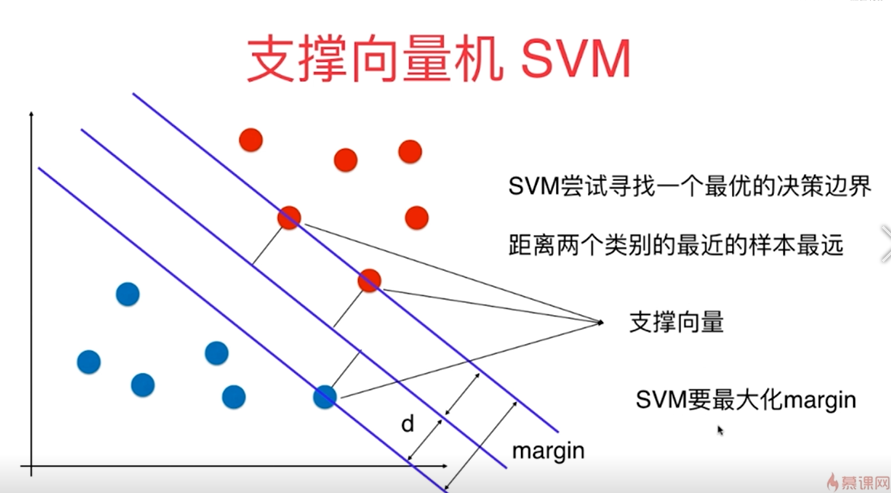

### SVM 要最大化margin 解决的是线性可分问题

### 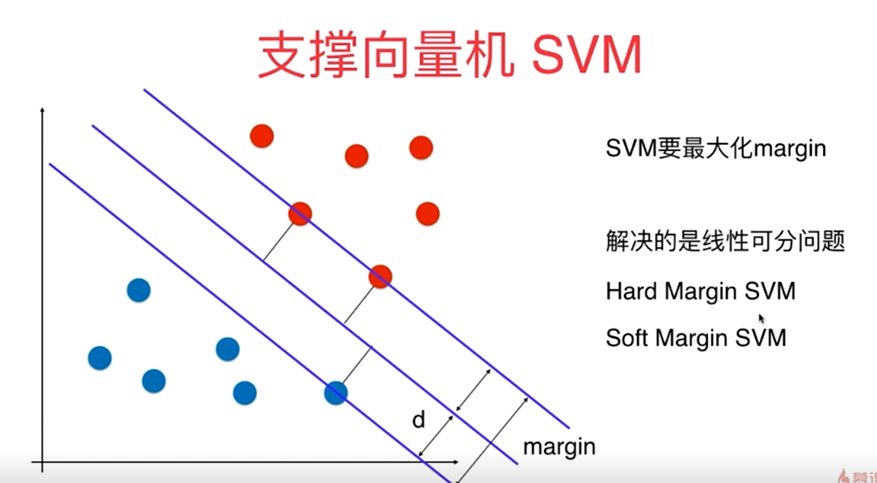

### 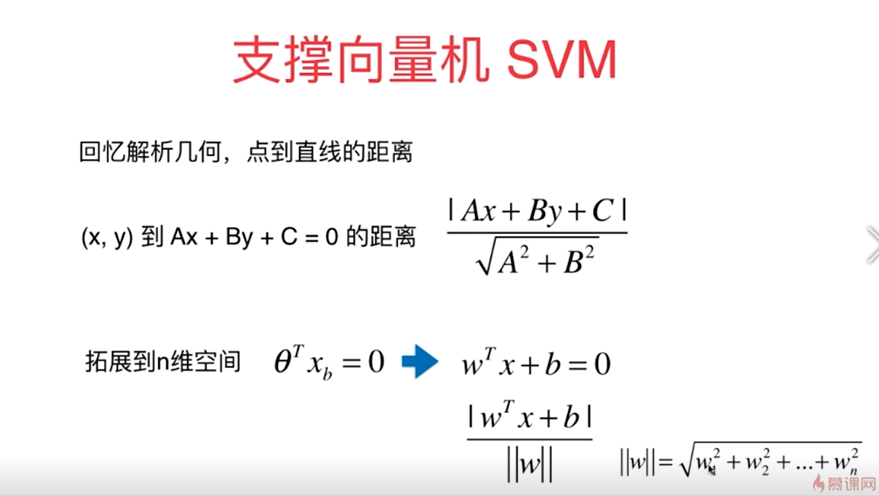

### 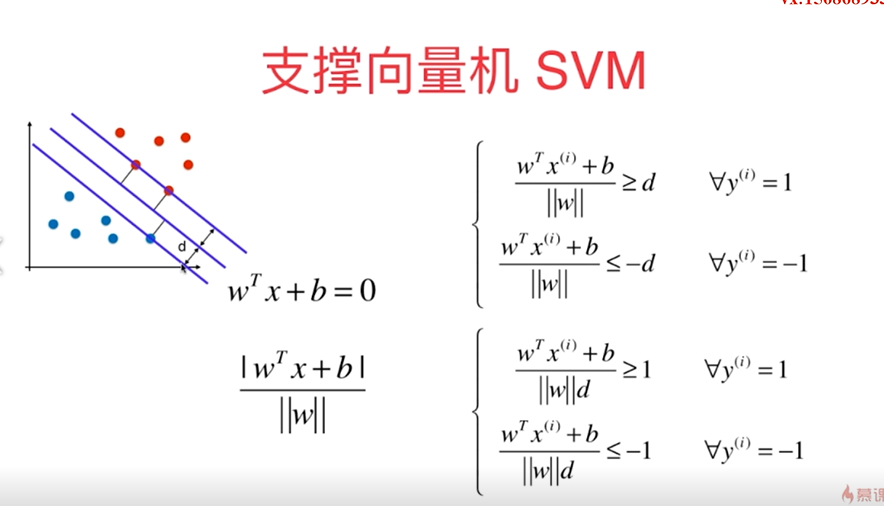

### 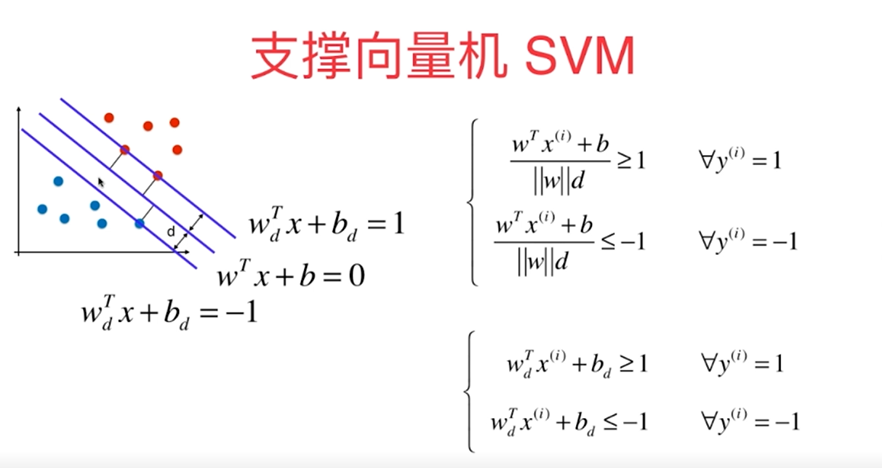

###  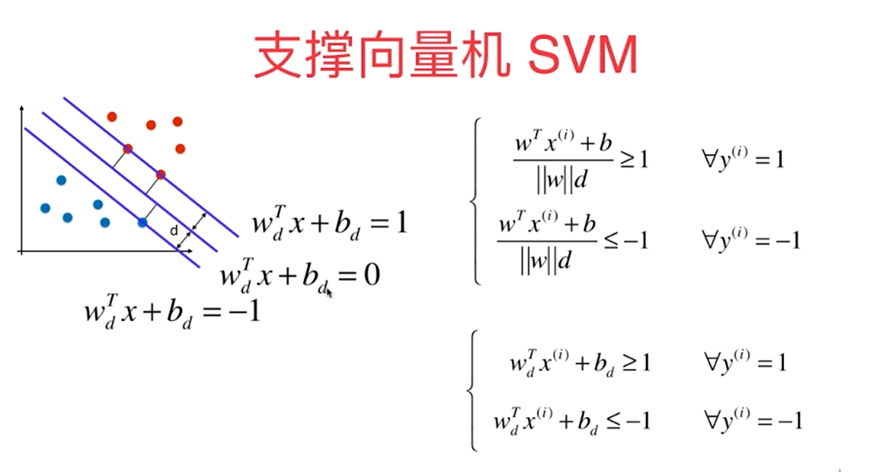

### 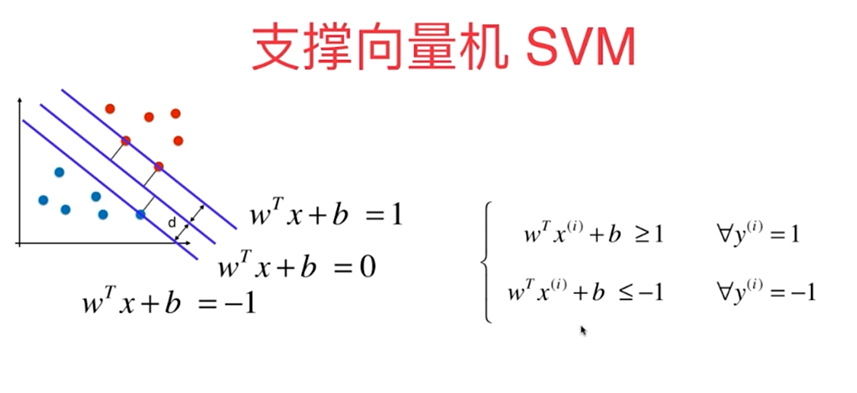

### 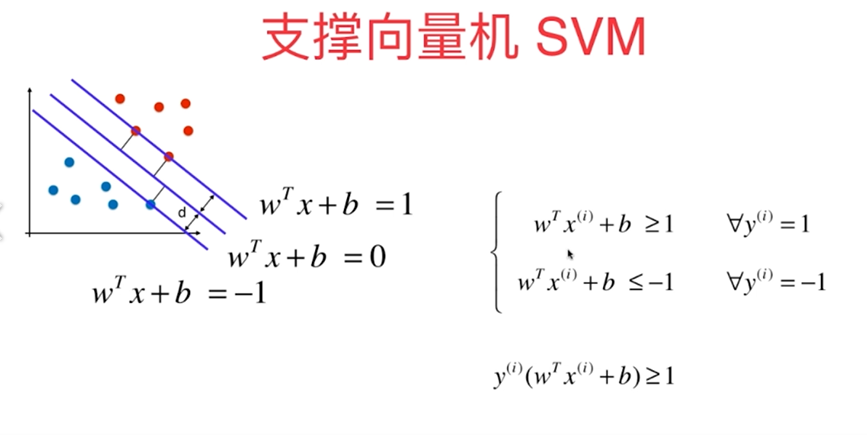

### 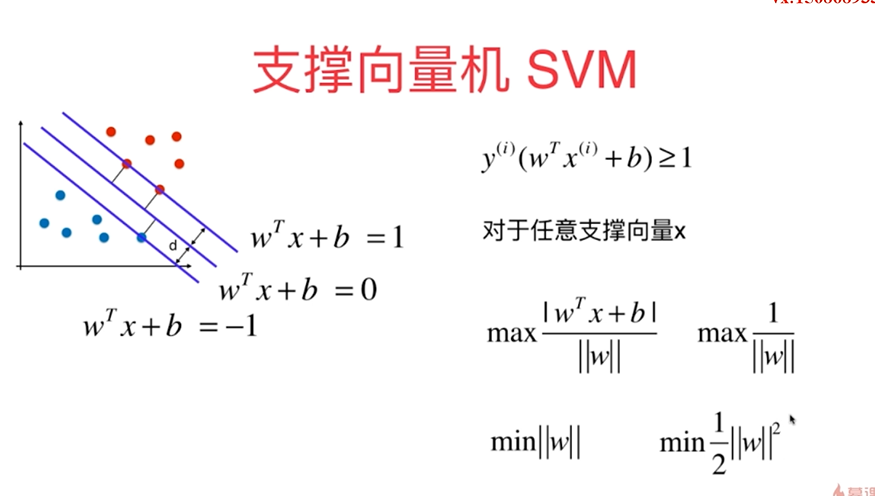

### 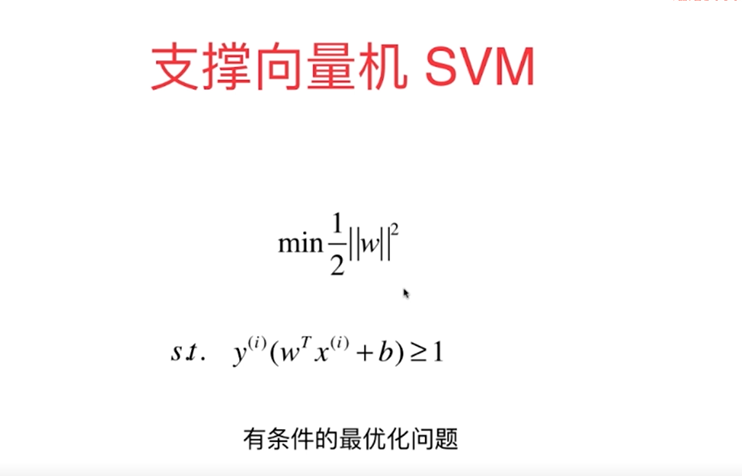

# 2. soft Margin 和SVM 的正则化

### 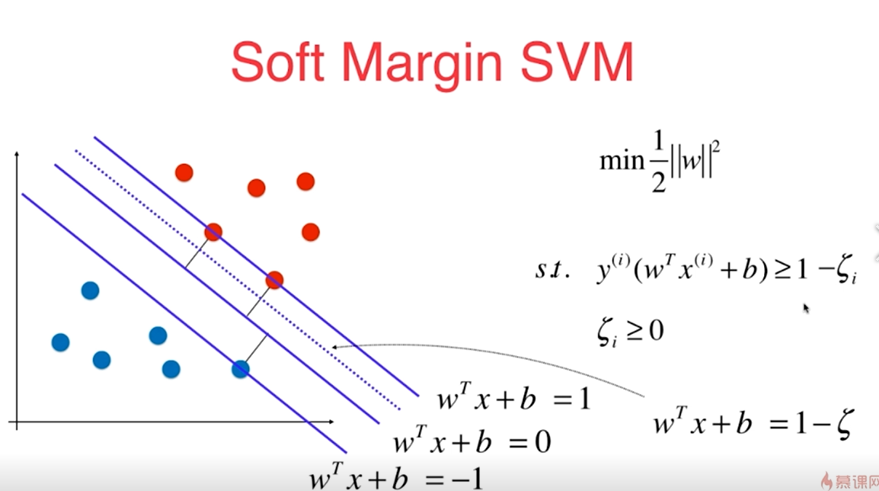

### 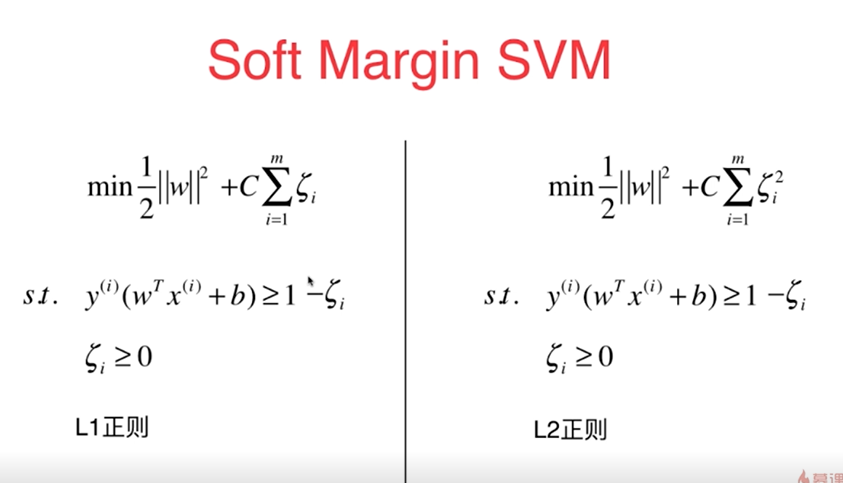

### C 越大是容错的能力越小

# 3. scikit 中的SVM进行计算

# 需要进行数据的归一化

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [60]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
x = X[y<2,:2]
y = y[y<2]

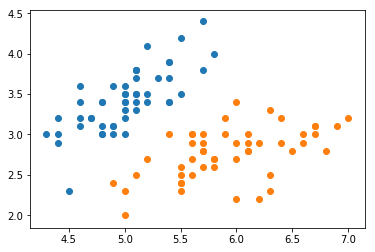

In [61]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [62]:
standarScaler = StandardScaler()
standarScaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
X_standard = standarScaler.transform(x)

In [64]:
svc = LinearSVC(C =1e9)

In [65]:
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [66]:
def plot_decison_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    cusom_cmp = ListedColormap(['r','g','b'])
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = cusom_cmp)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


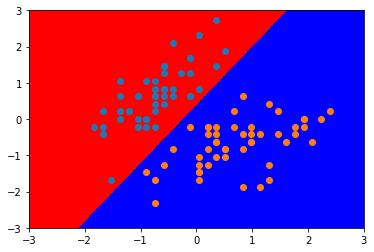

In [67]:
plot_decison_boundary(svc,axis = [-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


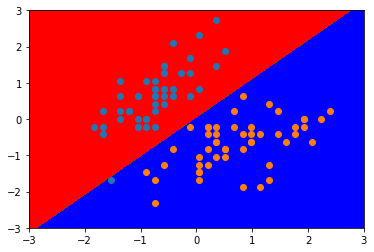

In [68]:
svc = LinearSVC(C =0.01)
svc.fit(X_standard,y)
plot_decison_boundary(svc,axis = [-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])

In [69]:
svc.coef_

array([[ 0.43789781, -0.41091967]])

In [70]:
svc.intercept_

array([0.00592577])

In [71]:
def plot_svc_decison_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    cusom_cmp = ListedColormap(['r','g','b'])
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = cusom_cmp)
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0*x0 + w1*x1+b = 0
    # => x1 = -w0/w1*x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1],200)
    up_y = -w[0]/w[1]*plot_x - b/w[1]+1/w[1]
    down_y = -w[0]/w[1]*plot_x - b/w[1]-1/w[1]
    up_index = ((up_y >= axis[2])&(up_y<=axis[3]))
    down_index = ((up_y >= axis[2])&(up_y<=axis[3]))
    plt.plot(plot_x[up_index],up_y[up_index],color = 'black')
    plt.plot(plot_x[down_index],down_y[down_index],color = 'black')

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


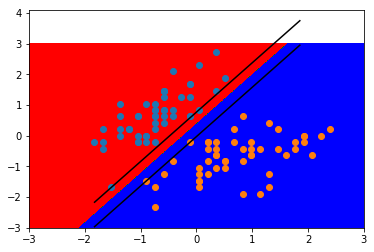

In [72]:
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)
plot_svc_decison_boundary(svc,axis = [-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])

# 4 .SVM 使用多项式

In [73]:
from sklearn import datasets
x, y = datasets.make_moons(noise=0.15)

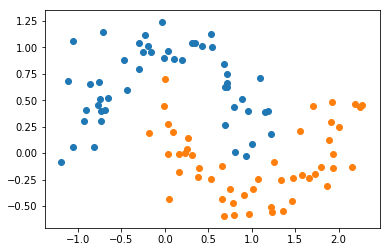

In [74]:
from sklearn import datasets
x, y = datasets.make_moons(noise=0.15)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [75]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [76]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
def PolynomialSVC(degree,C =0.1):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('linearSVC',LinearSVC(C =C))
    ])

In [77]:
ploy_scv = PolynomialSVC(degree= 3)

In [78]:
ploy_scv.fit(x,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


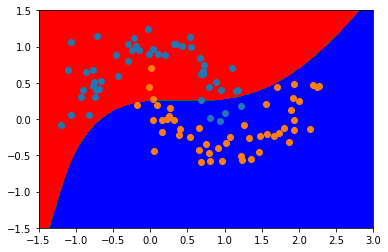

In [79]:
plot_decison_boundary(ploy_scv,axis = [-1.5,3,-1.5,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

###  使用多项式核函数的SVM

In [80]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
def PolynomialSVC(degree,C=0.1):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('SVC',SVC(kernel = 'poly',degree = degree,C = C))
    ])

In [81]:
ploy_scv = PolynomialSVC(degree=3)
ploy_scv.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


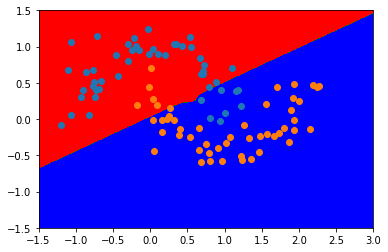

In [82]:
plot_decison_boundary(ploy_scv,axis = [-1.5,3,-1.5,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

# 6. 核函数

### 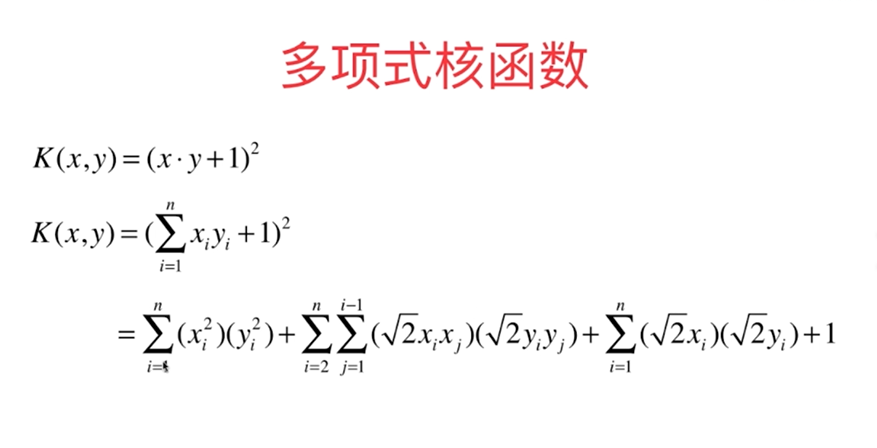

# 7. 高斯核函数

### 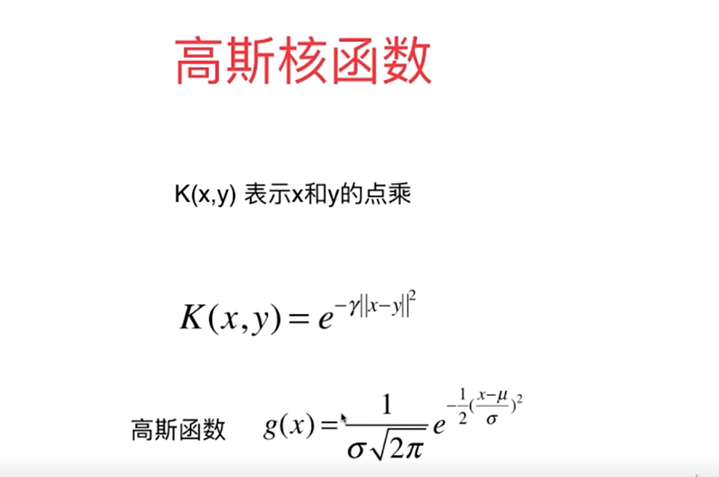

### 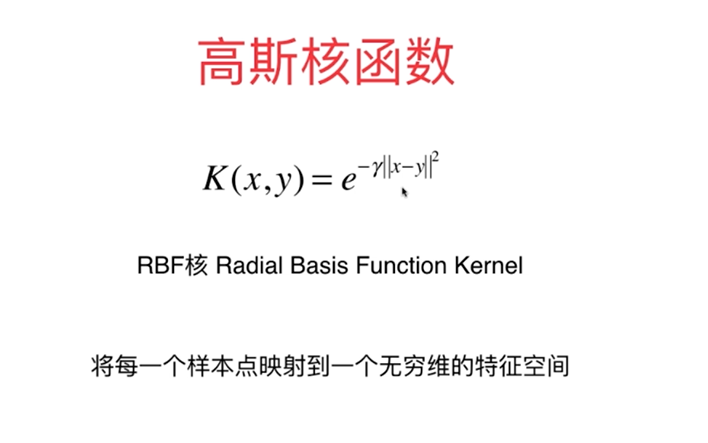

### 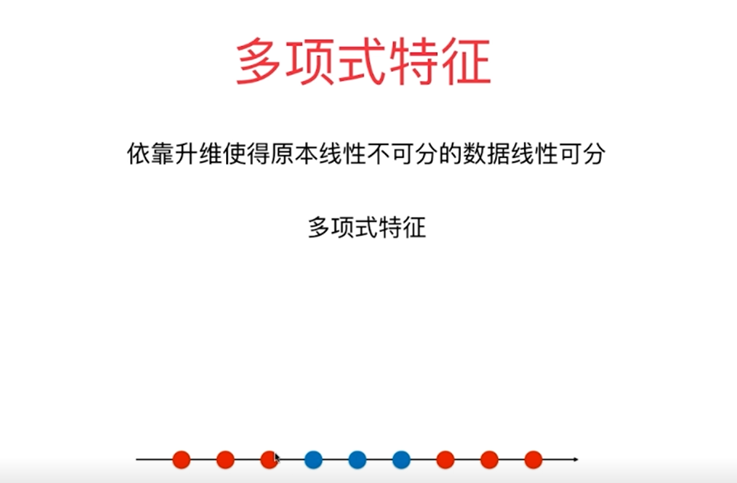

### 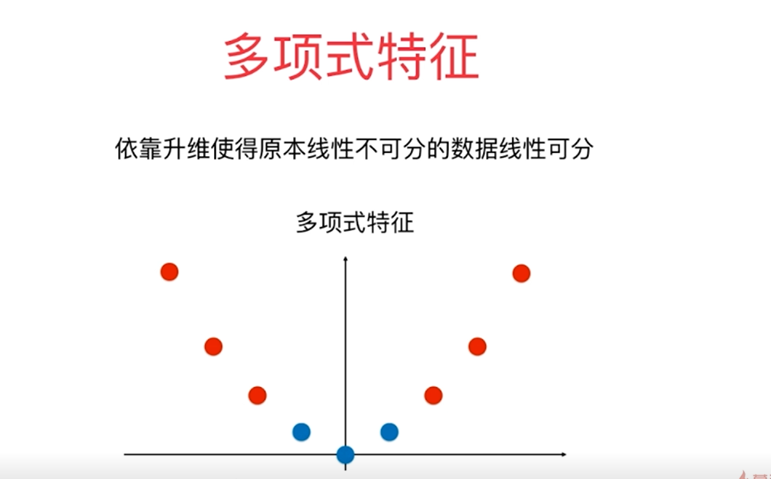

In [83]:
import numpy as np 
import matplotlib.pyplot as plt

In [84]:
x = np.arange(-4,5,1)

In [85]:
y = np.array((x>=-2) & (x<=2),dtype = 'int')

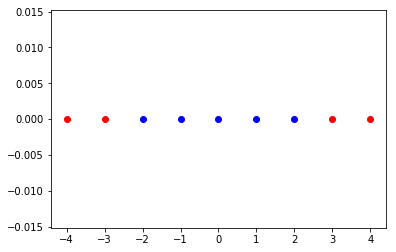

In [86]:
plt.scatter(x[y==0],0*y[y==0],color = 'r')
plt.scatter(x[y==1],0*y[y==1],color = 'b')

In [87]:
def guanssian(x,l):
    gamma = 1.0
    return np.exp(-gamma*(x-l)**2)

In [88]:
l1,l2 = -1,1
X_new = np.empty((len(x),2))
for i ,date in enumerate(x):
    X_new[i,0] = guanssian(date,l1)
    X_new[i,1] = guanssian(date,l2)

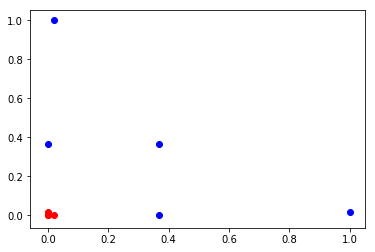

In [89]:
plt.scatter(X_new[y==0,0],X_new[y==0,1],color = 'r')
plt.scatter(X_new[y==1,0],X_new[y==1,1],color = 'b')

### 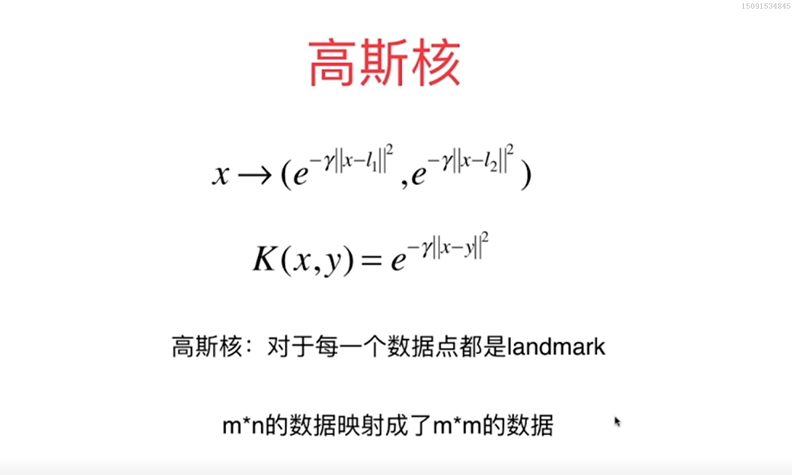

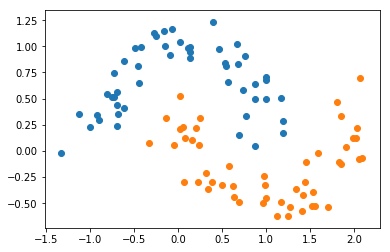

In [90]:
from sklearn import datasets
x, y = datasets.make_moons(noise=0.15)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [92]:
def BRFKernelSVC(gamma =1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel = 'rbf',gamma = gamma))
    ])
   
    

In [93]:
svc = BRFKernelSVC(gamma=1.0)
svc.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [94]:
def plot_decison_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    cusom_cmp = ListedColormap(['r','g','b'])
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = cusom_cmp)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


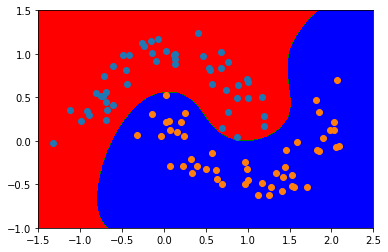

In [95]:
plot_decison_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


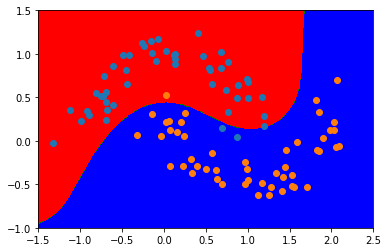

In [96]:
svc = BRFKernelSVC(gamma=0.5)
svc.fit(x,y)
plot_decison_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

### gamma 调整模型的复杂度

# 8. SVM 解决回归的问题

In [97]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [98]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train,y_test = train_test_split(X,y,random_state = 666)

In [99]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [114]:
def StandarLinearSVR(epsilon=0.1):
    return Pipeline([
       ( 'std_scaler',StandardScaler()),
        ('LinearSVR',LinearSVR(epsilon= epsilon))
    ])

In [117]:
svr = StandarLinearSVR()

In [118]:
svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LinearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [119]:
svr.score(x_test,y_test)

0.6358377051797768